In [ ]:
%pip install tensorflow numpy matplotlib

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.cifar10.load_data()
train_images=train_images/127.5-1
test_images=test_images/127.5-1
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [ ]:
print('Number of images in the training dataset:',train_images.shape[0])
print('Number of images in the test dataset:',test_images.shape[0])

Number of images in the training dataset: 50000
Number of images in the test dataset: 10000


In [ ]:
print(f'Shape of the images in the training dataset:{train_images[0].shape}')

Shape of the images in the training dataset:(32, 32, 3)


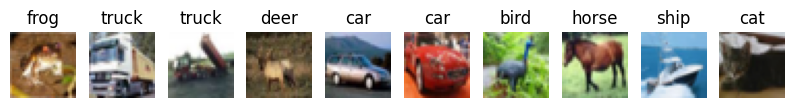

In [ ]:
fig,axes=plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    image=train_images[i]
    denormalised_image=(image+1)*127.5
    denormalised_image = np.clip(denormalised_image, 0, 255).astype(np.uint8)
    axes[i].imshow(denormalised_image)
    axes[i].set_title(classes[train_labels[i][0]])
    axes[i].axis('off')
plt.show()

In [ ]:
model = models.Sequential([
  layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D((2, 2), strides=(2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2), strides=(2, 2)),
  layers.Flatten(),
  layers.Dense(120, activation='relu'),
  layers.Dense(84, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 120)            │       553,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 639,742 (2.44 MB)

 Trainable params: 639,742 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.4440 - loss: 1.5348 - val_accuracy: 0.6428 - val_loss: 1.0090
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.6737 - loss: 0.9345 - val_accuracy: 0.6950 - val_loss: 0.8806
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7403 - loss: 0.7368 - val_accuracy: 0.6984 - val_loss: 0.8840
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7937 - loss: 0.5930 - val_accuracy: 0.7204 - val_loss: 0.8402
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8346 - loss: 0.4744 - val_accuracy: 0.7148 - val_loss: 0.9105
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8691 - loss: 0.3684 - val_accuracy: 0.7216 - val_loss: 0.9197
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9000 - loss: 0.2876 - val_accuracy: 0.7195 - val_loss: 0.9883
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9195 - loss: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


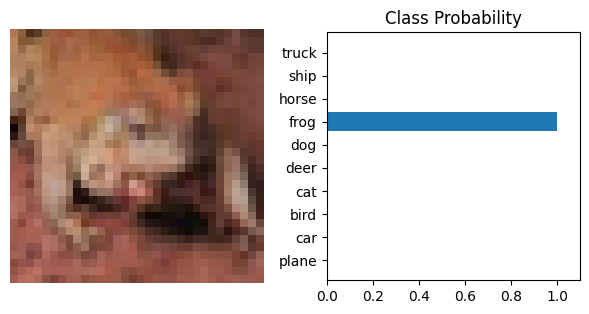

In [ ]:
def view_classification(image,probabilities):
  fig,(ax1,ax2)=plt.subplots(figsize=(6,9),ncols=2)
  denormalised_image=(image+1)/2
  ax1.imshow(denormalised_image)
  ax1.axis('off')
  ax2.barh(np.arange(10),probabilities)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(10))
  ax2.set_yticklabels(classes)
  ax2.set_title('Class Probability')
  ax2.set_xlim(0,1.1)
  plt.tight_layout()

index=5
image,label=test_images[index],test_labels[index]
probabilities=model.predict(image.reshape(1,32,32,3))
view_classification(image,probabilities[0])

In [ ]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images:{test_accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7176 - loss: 1.3236
Accuracy of the neural network on the 10000 test images:71.71%
